# ACME Camping Supplies sales performance

This is my 3-hours worth of work on the [Retail Challenge](https://github.com/eliiza/challenge-retail).  (Note that I'm assuming that the data for 2007 is complete).

Here I use [plotly](https://plotly.com/python/) to generate graphs. Feel free to zoom, pan, select etc., just hit the house icon to reset. Note that you can single-click in the legend to remove a group or double-click to remove all EXCEPT that group.

## Setup

In [1]:
import pandas as pd
import plotly.express as px
from math import log10 as log
from scipy.stats import linregress


raw_data = pd.read_csv('data/01_raw/Retail.csv')

<a id=’sales-performance’></a>
# Q1 - Sales Performance

Analysed by 
country, sales channel, product and year.

## Year

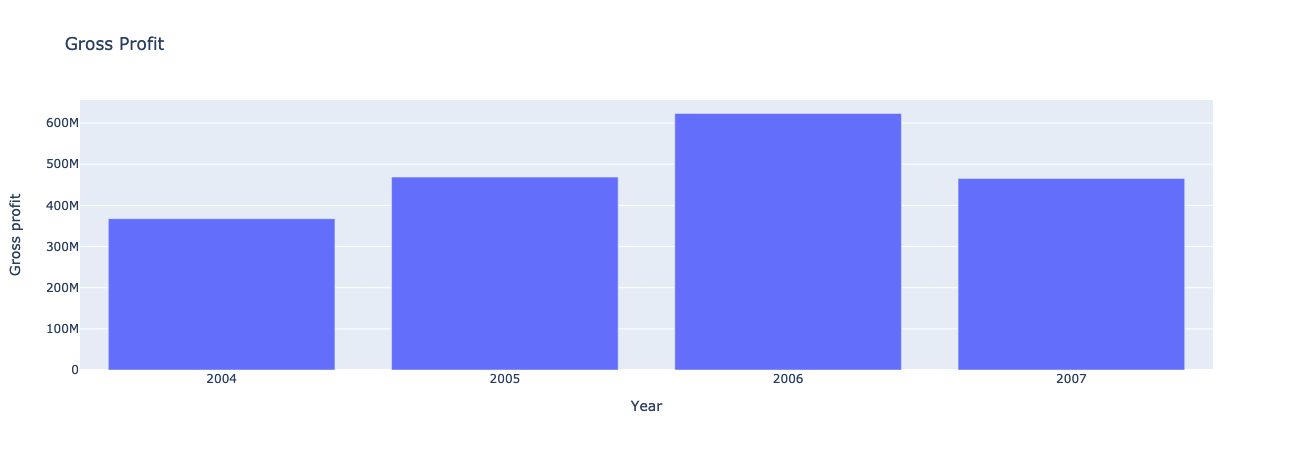

In [2]:
performance_year = raw_data.groupby(['Year']).sum()
performance_year['Gross profit yoy%'] = performance_year[['Gross profit']].apply(pd.Series.pct_change)

fig = px.bar(performance_year.reset_index(), 
        x='Year', 
        y='Gross profit',
        title="Gross Profit",
        hover_data={'Gross profit yoy%':':.2%'})
fig.update_xaxes(type='category')
fig.show()

Gross profit has increased over 2004-2006 but has dropped 25.35% from 2006 to 2007.

Hover over the graph for values.

## Country

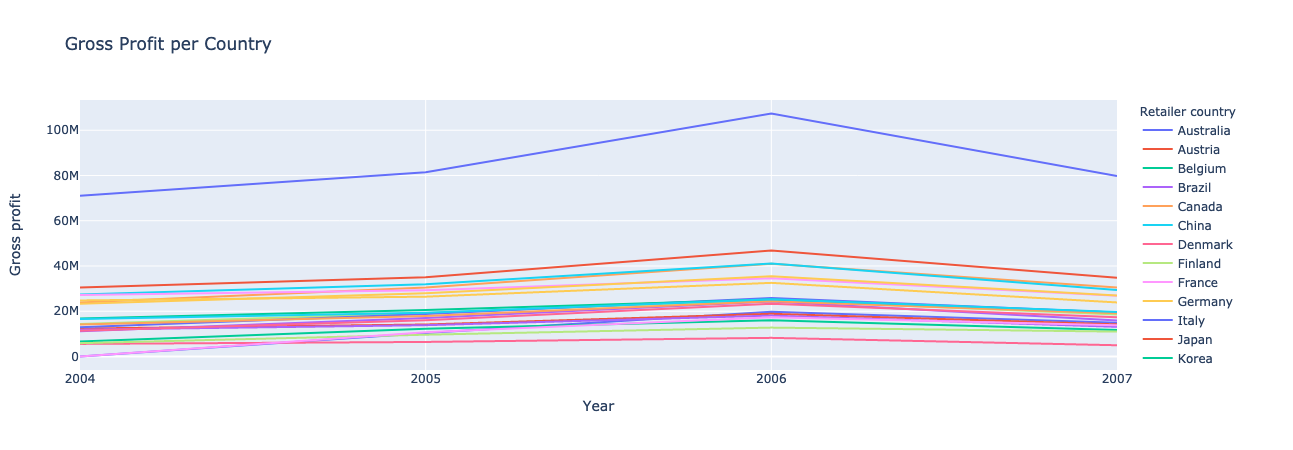

In [3]:
performance_country = raw_data.groupby(['Year', 'Retailer country']).sum()
fig = px.line(performance_country.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Retailer country',
        title="Gross Profit per Country").update_xaxes(type='category')
# fig.update_xaxes(type='category')
fig.show()

Here we can see that Gross Profit is down across the board for 2007. The following chart shows the YoY % change for each country

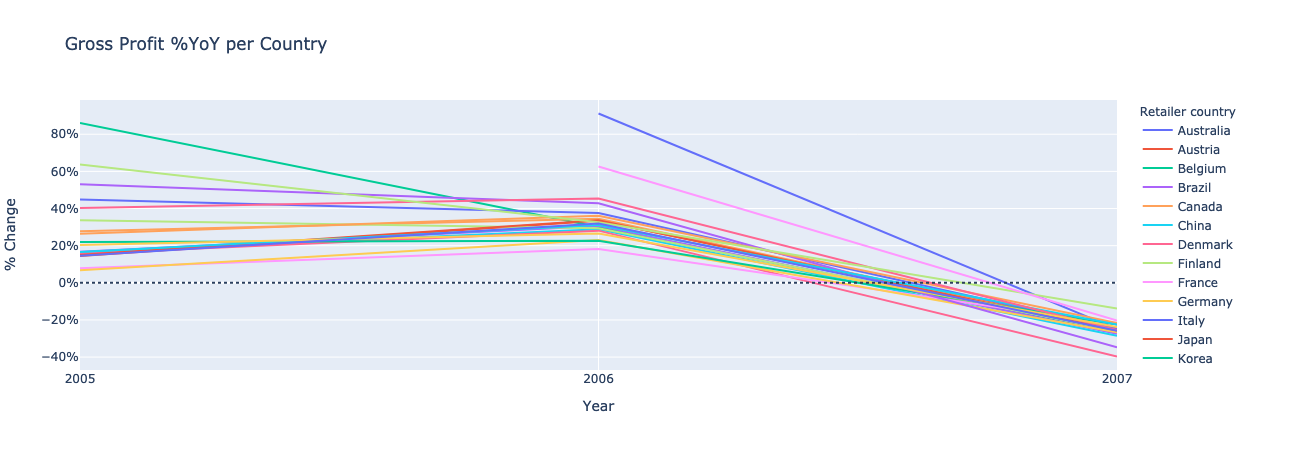

In [4]:
performance_country['Gross profit yoy%'] = performance_country.groupby('Retailer country')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_country.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Retailer country',
        title="Gross Profit %YoY per Country",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

The drop for 2007 ranges from -13.90% for Sweden, to -39.68% in Denmark.

That the drop is consistent for all countries indicates that the cause is systemic. It could be either external, e.g. competition or global consumer confidence, or internal, e.g. poor customer service, loss of popular product line etc.


Let's look at sales channel performance to see if this sheds light on any issues with customer interactions.

## Sales channel

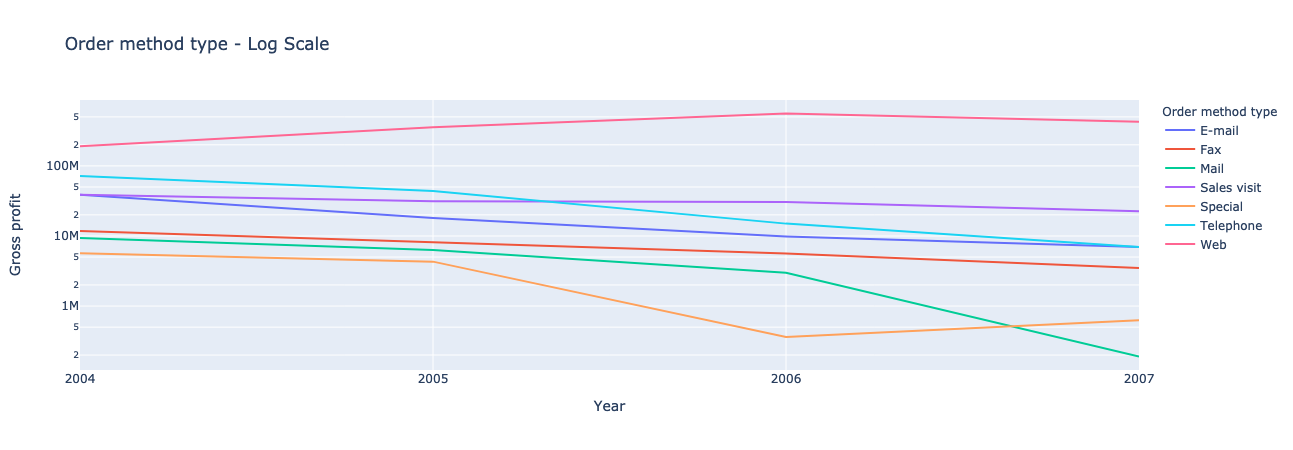

In [5]:
performance_channel = raw_data.groupby(['Year', 'Order method type']).sum()
fig = px.line(performance_channel.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Order method type',
        title="Order method type - Log Scale")
fig.update_xaxes(type='category')
fig.update_yaxes(type='log')
fig.show()

Web sales dominate for our Camping supplies store and they have dropped substantially. The following chart shows the yoy% changes.

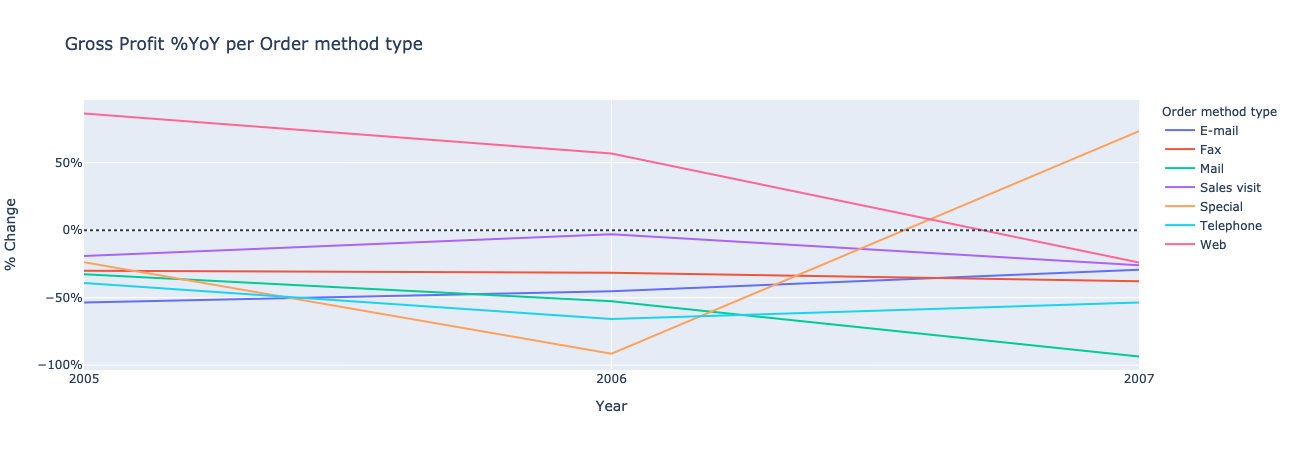

In [6]:
performance_channel['Gross profit yoy%'] = performance_channel.groupby('Order method type')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_channel.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Order method type',
        title="Gross Profit %YoY per Order method type",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

Again, drops across the board except for 'Special' which is very low volume. Let's facet Country performance across Channel.

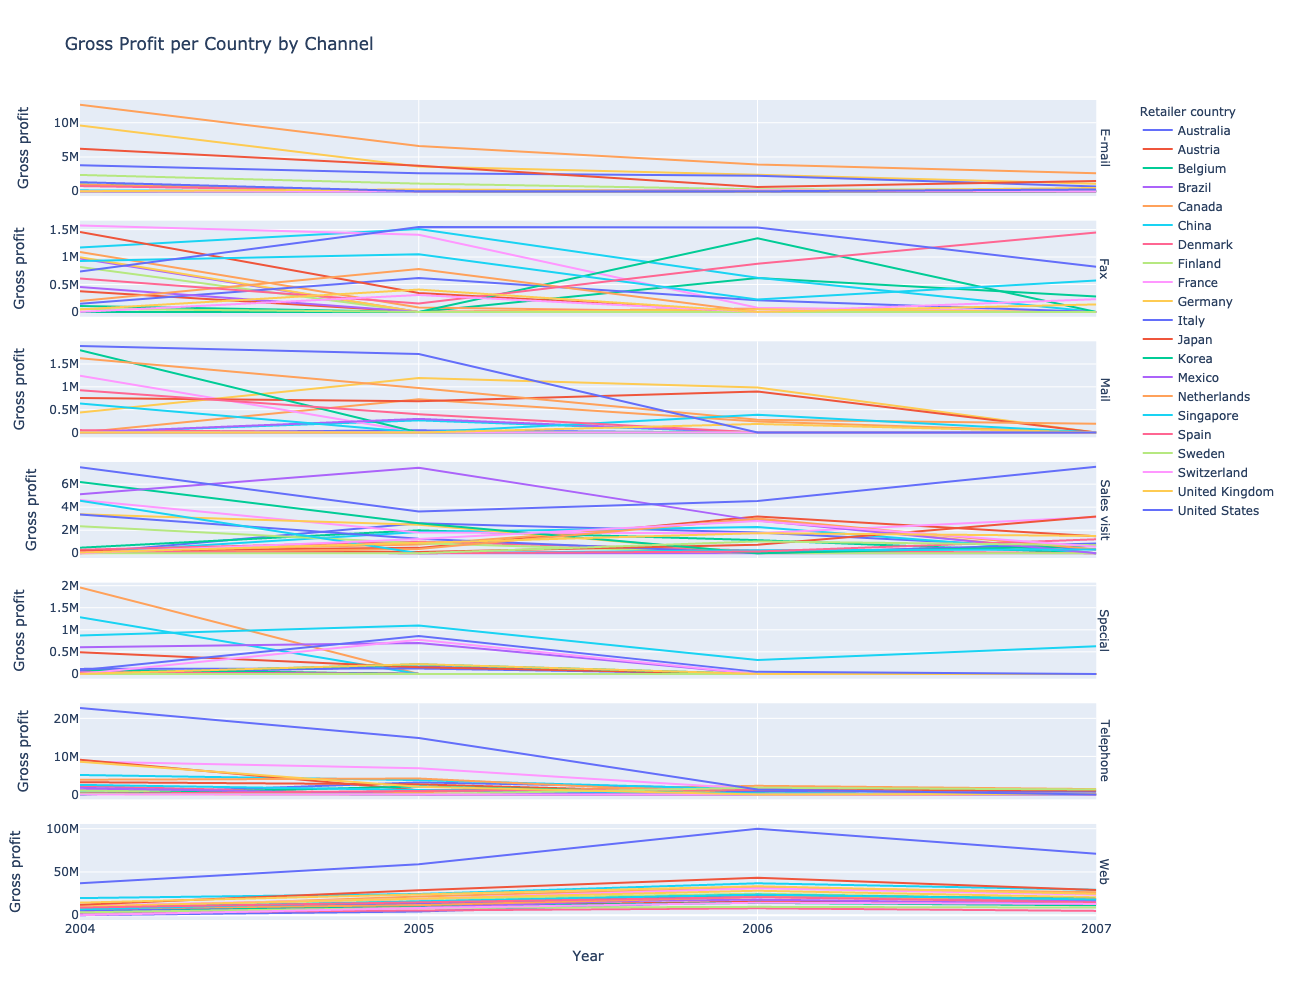

In [7]:
performance_country_channel = raw_data.groupby(['Year', 'Retailer country', 'Order method type']).sum()
performance_country_channel['Gross profit yoy%'] = performance_country_channel.groupby('Retailer country')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_country_channel.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Retailer country',
        title="Gross Profit per Country by Channel",
        hover_data={'Gross profit': ':,.0f'},
             facet_row='Order method type',
             height=1000)
fig.update_xaxes(type='category')
# fig.update_yaxes(tickformat=',.0f')
fig.update_yaxes(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

Not too much here to help solve our downturn challenge.

Some elements of note (Remember to double click a country name in the legend to focus in on it, then add countries back in one by one to compare):
- Spaniards are increasingly using fax in 2007
- USA, Japan and France are seeing decent gains in Sales Visits for 2007

Let's see if anything interesting is happening across products, lines and type.

## Product line

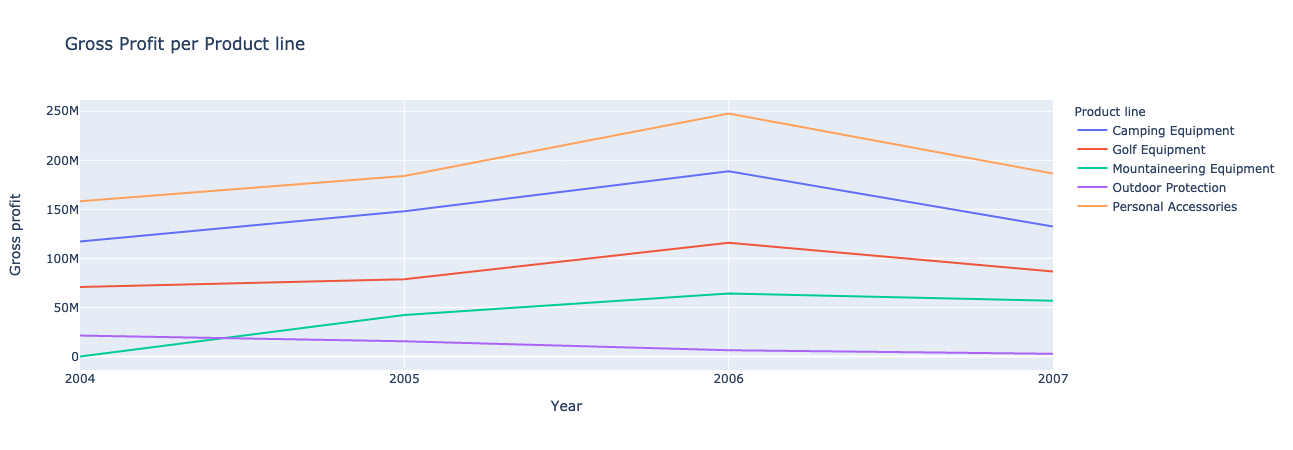

In [8]:
performance_line = raw_data.groupby(['Year', 'Product line']).sum()
fig = px.line(performance_line.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product line',
        title="Gross Profit per Product line",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

Our decreasing performance is across all product lines. The following %YoY graph further highlighting as such.

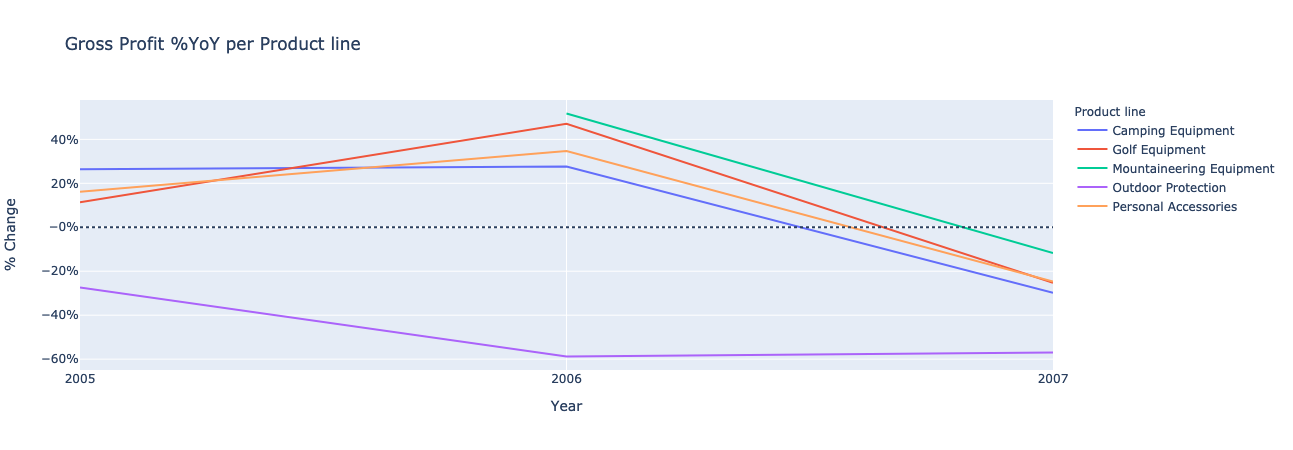

In [9]:
performance_line['Gross profit yoy%'] = performance_line.groupby('Product line')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_line.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product line',
        title="Gross Profit %YoY per Product line",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()


## Product type

Let's keep drilling down to see if there are any product types of note.

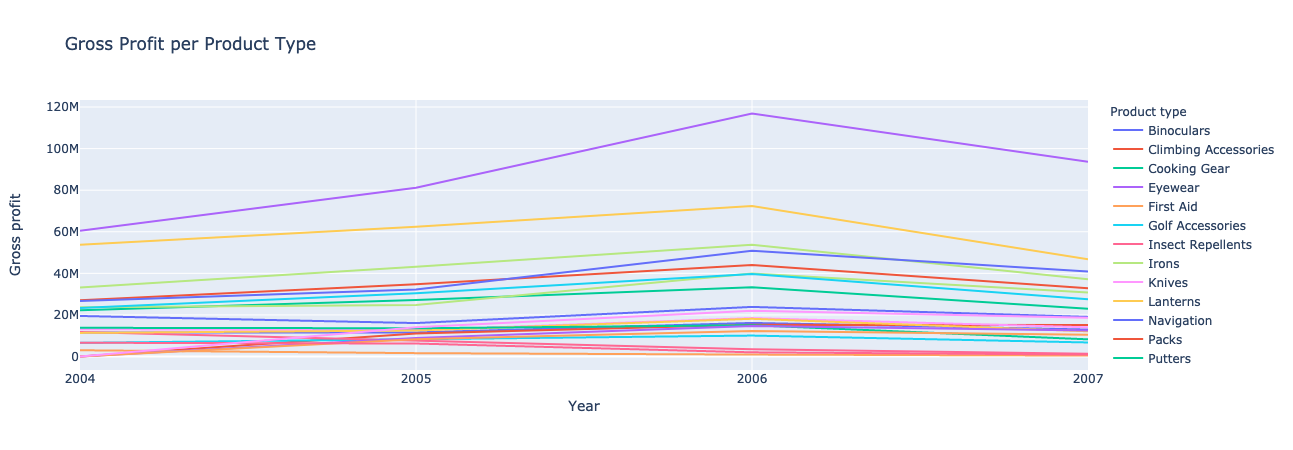

In [10]:
performance_type = raw_data.groupby(['Year', 'Product type']).sum()
fig = px.line(performance_type.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product type',
        title="Gross Profit per Product Type",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

Watches and Eyeware are the big money makers.

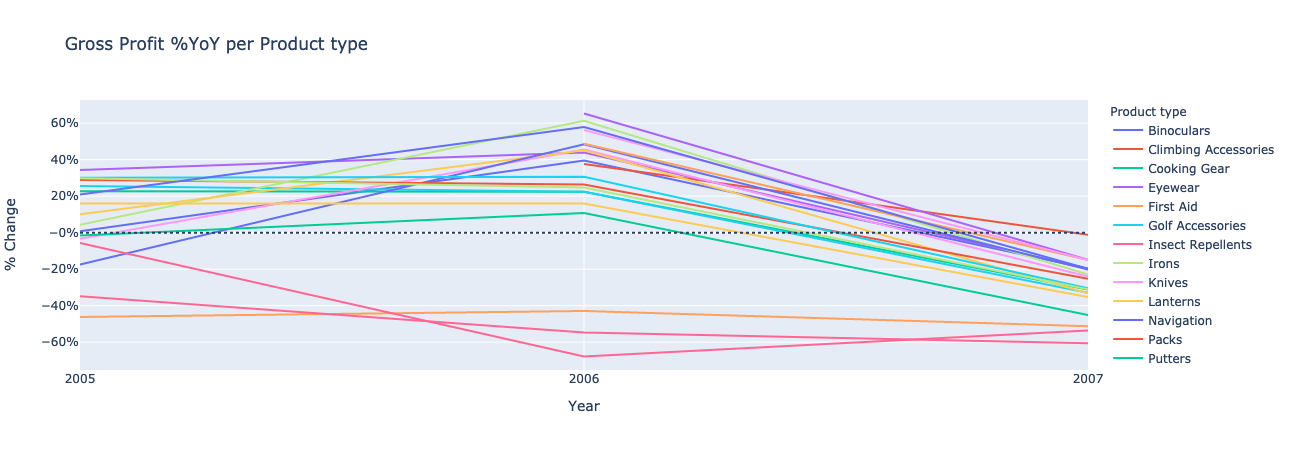

In [11]:
performance_type['Gross profit yoy%'] = performance_type.groupby('Product type')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_type.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product type',
        title="Gross Profit %YoY per Product type",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()


Looks like climbing equipment is the best Product type showing the smallest %YoY drop for 2007, -1.15%, and $15M Gross profit.

## Product

We've got one more level to drill down: Product! There are 144 unique products so this will be a noisy plot; Let's see if there is anything interesting..

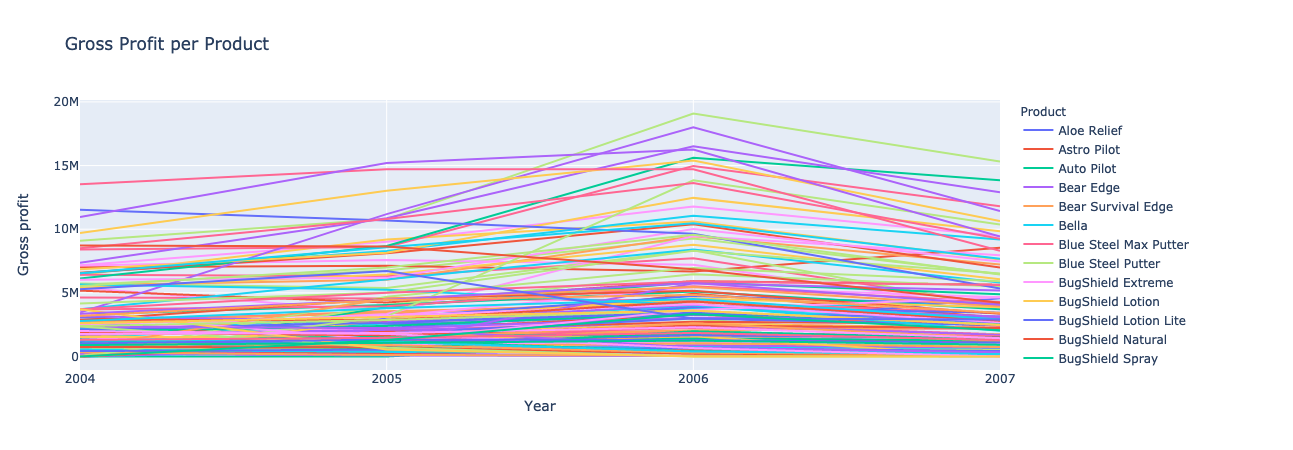

In [12]:
performance_product = raw_data.groupby(['Year', 'Product']).sum()
fig = px.line(performance_product.reset_index(), 
        x='Year', 
        y='Gross profit', 
        color='Product',
        title="Gross Profit per Product",
             hover_data={'Quantity': ':,'})
fig.update_xaxes(type='category')
fig.show()

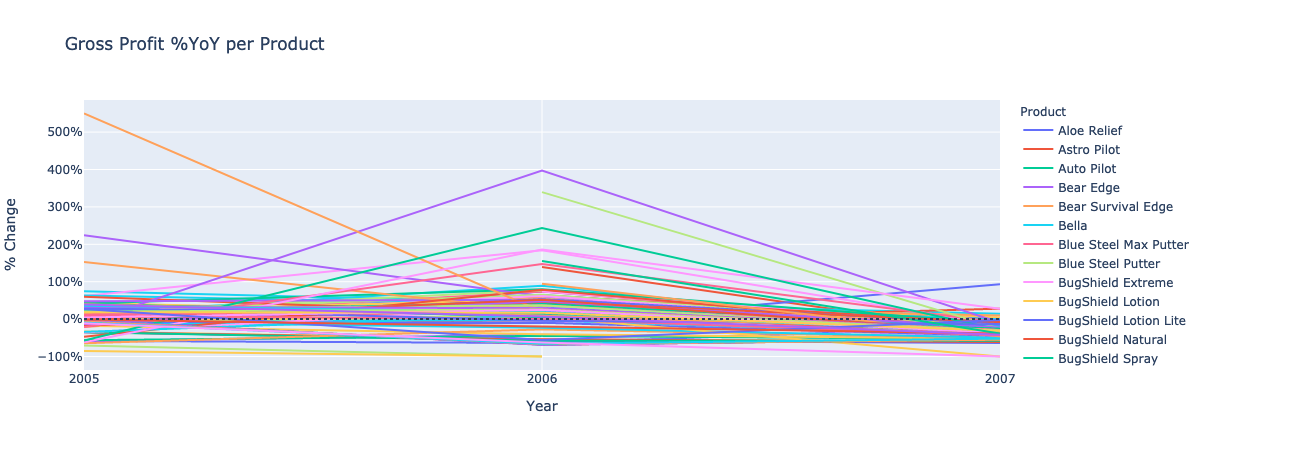

In [13]:
performance_product['Gross profit yoy%'] = performance_product.groupby('Product')[['Gross profit']].apply(pd.Series.pct_change)
fig = px.line(performance_product.drop(index=2004).reset_index(), 
        x='Year', 
        y='Gross profit yoy%', 
        color='Product',
        title="Gross Profit %YoY per Product",
        hover_data={'Gross profit yoy%':':.2%',
                   'Gross profit': ':,.0f',
                   'Quantity': ':,'},
        labels={'Gross profit yoy%': '% Change'})
fig.update_xaxes(type='category')
fig.update_yaxes(tickformat=',.0%')
fig.add_hline(y=0, line_dash='dot')
fig.show()

Zooming into 2007 around the 0% YoY mark, there are a few successful products:
- Capri: 93.3% Gross profit increase 2006-2007, \$4.58M Gross profit
- Cat Eye: 27.9% YoY growth, \$8.54M Gross profit
- Sam (A watch): 27.56% growth, \$4.66M profit

## Remarks
Across the board business is down for 2007. There a couple of products and channels that are performing well but not enough to offset the huge drop in business in the `United States` market. Next up we'll investigate ideas for picking up profit for 2008!

# Q2 - recommendations for improving the store's profit

How can we improve profit? In the context of the current exercise we can explore:
1. Increase Revenue
    1. Sell more
    1. Increase `Unit price`
1. Decrease Expenses
    1. Decrease `Unit cost`
1. Increase capital efficiency - Stop buying/holding stock which does not contribute enough to revenue and gross profit.

We'll take a look at changes to `Unit price` and `Unit cost`, and the implications, later but first let's explore increasing revenue and capital efficiency.

## The Product Quadrant

The following section will first derive `Gross margin` as `Gross profit` / `Revenue` and then plot `Product type` (individual products make for a very busy graph) across multiple axes to identify 4 quadrants:
1. Stars - High `Quanitity`, High `Gross margin`, High `Unit price`
    - These are the money makers.
1. Efficiency targets - High `Quanitity`, Low `Gross margin`
    - These product types have great volume sold, so working on gross margin can help turn them into Stars.
1. Marketing targets - Low `Quanitity`, High `Gross margin`
    - These products have good margin but we need to up their `Quantity`; Investing some marketing spend into this category could help push them up into Star territory.
1. Simplification targets - Low `Quanitity`, Low `Gross margin` 
    - These products are candidates to remove from the catalogue: Use the capital for something more effective.

Our first graph is complex; Interpretation as follows:
- Each colour is a `Product type`
- Within each colour, each dot is a `Retailer country`
- The size of the dot is the sale price, AKA `Unit price`
- The x-axis is `Gross margin`
- The y-axis is log(`Quantity`)
- The stop/start controls allow the graph to display the above for each year. Mainly of focus for us will be 2006/2007

In an ideal world, everything would be big dots in the top right quadrant -> High margin, high quantity and high sale price. However, our world isn't that neat so let's make some compromises and see if we can identify some rough quadrants. Skip to the next graph for some ideas.

In [14]:
performance_profit = raw_data.copy()
performance_profit = performance_profit.assign(gross_margin = lambda x: x['Gross profit']/x['Revenue'] )

# performance_profit = performance_profit.groupby(['Year', 'Retailer country', 'Product type']).mean()
performance_profit = performance_profit.groupby(['Year', 'Retailer country', 'Product type']).agg(
{'Quantity': 'sum',
'gross_margin': 'mean',
'Unit price': 'mean',
'Revenue': 'sum'})


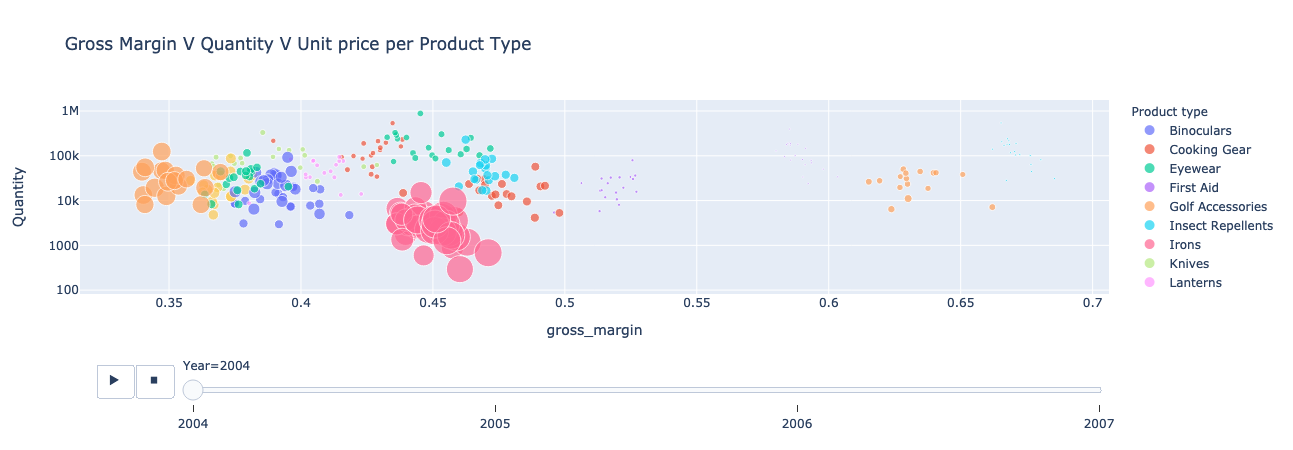

In [15]:
fig = px.scatter(performance_profit.dropna().reset_index(),
        x='gross_margin',
        y='Quantity',
        color='Product type',
        size='Unit price',
        title="Gross Margin V Quantity V Unit price per Product Type",
             hover_data={'Quantity': ':,',
                        'Retailer country': True,
                        'Unit price': True,
                        'Revenue': True},
                animation_frame="Year",
                animation_group="Retailer country")
fig.update_yaxes(type='log')
fig.show()

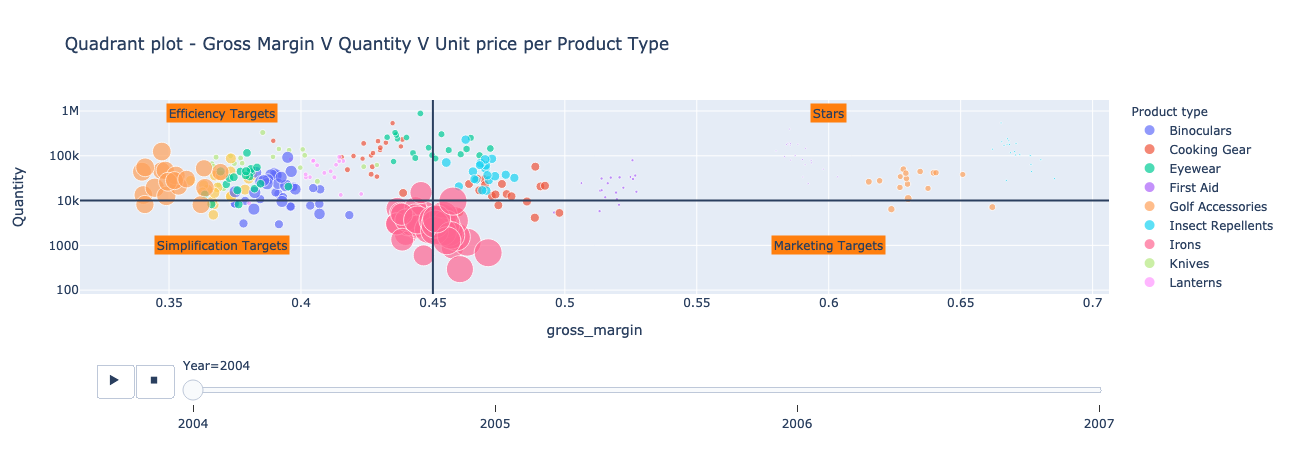

In [16]:
fig = px.scatter(performance_profit.dropna().reset_index(),
        x='gross_margin',
        y='Quantity',
        color='Product type',
        size='Unit price',
        title="Quadrant plot - Gross Margin V Quantity V Unit price per Product Type",
             hover_data={'Quantity': ':,',
                        'Retailer country': True,
                        'Unit price': True,
                        'Revenue': True},
                animation_frame="Year",
                animation_group="Retailer country")

fig.update_yaxes(type='log')
fig.add_hline(y=10000)
fig.add_vline(x=0.45)
fig.add_annotation(x=0.6, y=log(900000),
            text="Stars",
                  showarrow=False,
                  bgcolor="#ff7f0e")
fig.add_annotation(x=0.37, y=log(900000),
            text="Efficiency Targets",
                  showarrow=False,
                  bgcolor="#ff7f0e")
fig.add_annotation(x=0.6, y=log(1000),
            text="Marketing Targets",
                  showarrow=False,
                  bgcolor="#ff7f0e")
fig.add_annotation(x=0.37, y=log(1000),
            text="Simplification Targets",
            showarrow=False,
                  bgcolor="#ff7f0e")
fig.show()

The values chosen need refinement through business context and collaboration, however, it provides some coarse guidance to our Campling Supply store for heading into 2008 with a plan.

## Relationship between price and demand

Next, let's explore and discuss the impact of changing gross margin, either through decreases to `Unit cost` or increases to `Unit price`. Changing these can potentially have an impact on consumer behaviour and hence Quantity sold. Think back to the last time you had a favourite product which kept the same price but started offering inferior quality... It's a delicate dance to perform and recommendations are far outside the scope of this data and analysis.
However, let's see if we can identify previous times that the business has changed these values and what the effects were.

For the following plot:
- y-axis is the correlation between `Quantity` and `Unit price` over the 4 years
- x-axis is the slope of an least squares regression across `Unit price` for the 4 years (Scaled to [-1,1] for ease of viewing)
- Each colour is a different `Product`, with the dots representing the different `Retailer countries`

The value of the dot on the x-axis shows how the trend for `Unit price` has changed over time. A high positive value indicates that have been price hikes, and a negative value indicates price reductions. The y-axis shows the correlation between this change in `Unit price` and any changes in `Quantity`. If increases to `Unit price` led to decreases in `Quantity` you would expect to see dots in the bottom right corner (increasing slope with negative correlation).

In [17]:
df = raw_data.groupby(['Retailer country', 'Product', 'Year']).mean().reset_index()
quantity_price_relationship = df[['Retailer country', 'Product']].drop_duplicates()
# Caclulate and scale slope to be between -1 and 1
slope = df.groupby(['Retailer country', 'Product']).apply(lambda x: linregress(x['Year'],x['Unit price'])[0])
slope = slope/slope.abs().max()

quantity_price_relationship = quantity_price_relationship.assign(
    correlation = df.groupby(['Retailer country', 'Product'])[['Quantity', 'Unit price']].corr().iloc[0::2,-1].values,
    slope = slope.values)

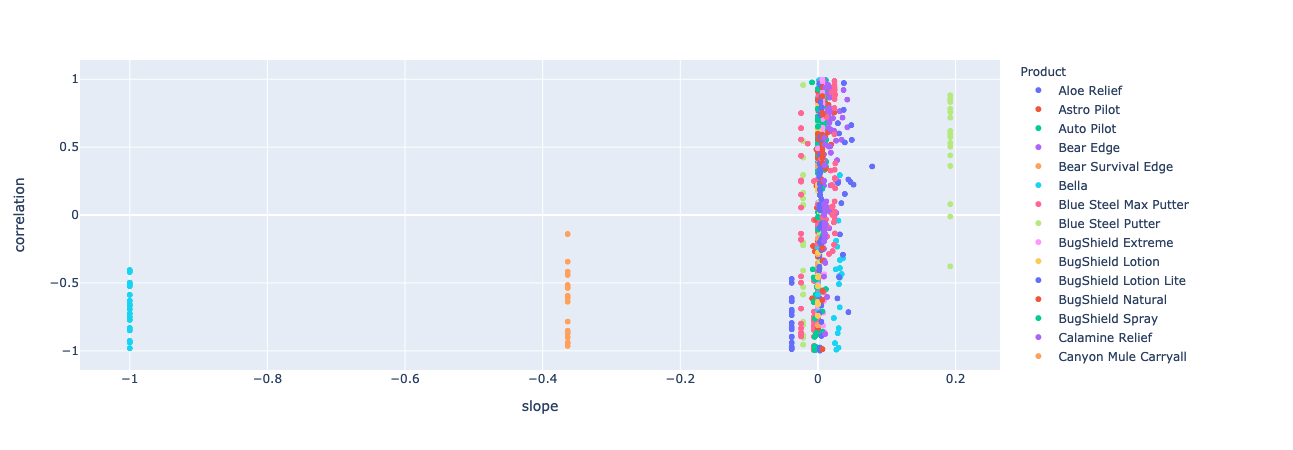

In [18]:
fig = px.scatter(quantity_price_relationship,
                y = 'correlation',
                x='slope',
                color='Product',
                hover_data={'Retailer country': True})
fig.show()

It doesn't appear that the Camping Supply store is having lots of occurences of loss of business due to price hikes. However, they have obviously not been having large increases to their `Unit price` values so they may not yet be testing the limit of their customer's patience.

If I had more time, I'd re-do this analysis to additionally look at changes in `Unit cost`. Also, I would explore the hypothesis from a different angle: I'd plot the YoY changes for `Quantity` and `Unit cost/price` across 2 axes instead of doing correlation and OLS slope stuff. I did it the hard way here `¯\_(ツ)_/¯`

# Q3 - Predict the next year of sales for each country.

Time series prediction with such a small data set (4 obs per level of prediction) is going to be very rough and inaccurate. However, it's _technically_ possible to do a simple regression with 3 observations... So let's give it a go!

Also, check out [Rob Hyndman](https://robjhyndman.com) for all things time series, especially [this treatise](https://robjhyndman.com/papers/shortseasonal.pdf) on forecasting with small sample size.


In [19]:
df = raw_data.groupby(['Retailer country', 'Year']).sum().reset_index()

def predictionator5000(group, year=2008):
    slope, intercept, *other = linregress(group['Year'], group['Revenue'])
    return intercept + slope * year
predictions = pd.DataFrame({'Revenue': df.groupby(['Retailer country']).apply(predictionator5000)}).reset_index()
predictions['Year'] = 2008
print(predictions)
revenue = pd.concat([df[['Retailer country', 'Year', 'Revenue']],
                     predictions])

   Retailer country       Revenue  Year
0         Australia  5.979306e+07  2008
1           Austria  4.112876e+07  2008
2           Belgium  3.933803e+07  2008
3            Brazil  3.853031e+07  2008
4            Canada  9.275641e+07  2008
5             China  8.597721e+07  2008
6           Denmark  1.492279e+07  2008
7           Finland  5.639436e+07  2008
8            France  7.222493e+07  2008
9           Germany  6.570904e+07  2008
10            Italy  6.155166e+07  2008
11            Japan  1.013662e+08  2008
12            Korea  5.629647e+07  2008
13           Mexico  5.379520e+07  2008
14      Netherlands  5.767121e+07  2008
15        Singapore  5.690585e+07  2008
16            Spain  5.545168e+07  2008
17           Sweden  3.410031e+07  2008
18      Switzerland  5.371351e+07  2008
19   United Kingdom  7.819884e+07  2008
20    United States  2.322796e+08  2008


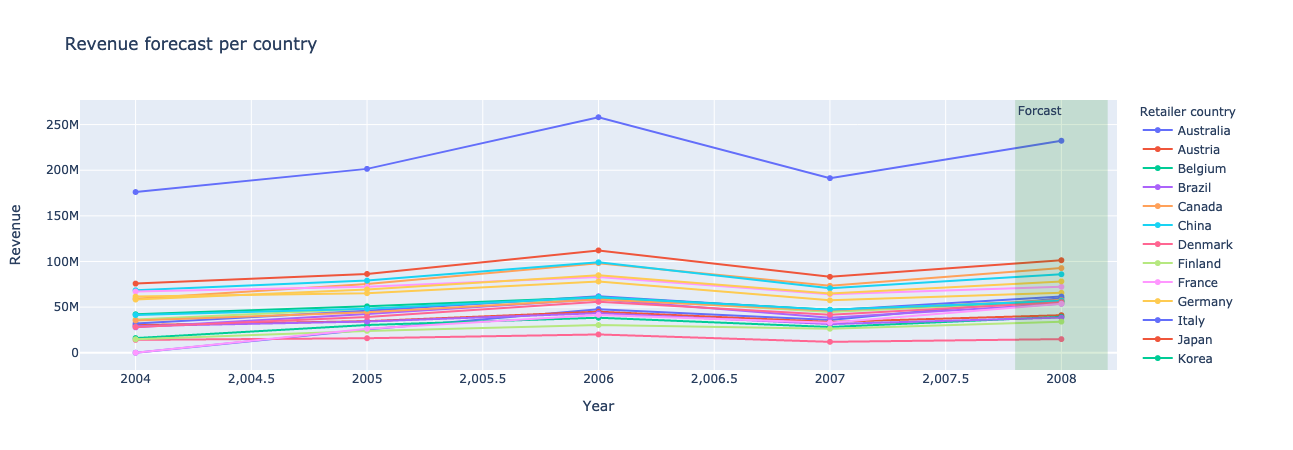

In [20]:
fig = px.line(revenue,
          x='Year',
          y='Revenue',
          color='Retailer country',
        title="Revenue forecast per country",)
fig.add_vrect(x0=2007.80,
             x1=2008.20,annotation_text="Forcast", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=0)
fig.update_traces(mode='markers+lines')
fig.show()

So we have generated some predictions but I'd like to briefly come back to the difficulty in forecasting short time series:
> Is the drop from '06 to '07 a change in the trend? Or is it a noisy blip on the radar? 

There is noway to tell, but the uncertainty, as a proportion of the total sample size, is massive and so makes this a guessing game. (See Q4 for a recommendation)

With the data we have, we may be better served by using simple mean/median and not trying to use a linear model, or a seasonal time series model.

# Q4 - Additional data to Collect

To address Q3, I'd ask for finer granularity revenue data so that we have enough observations to develop a seasonal time-series model. I'd be curious to see if we could tease out the ongoing direction of the revenue trend with such data.

To further investigate the causes of the drop, I'd be keen to understand who are the competitors and then investigate the annual reports of any which are publicly traded. That will give some insight to see if the cause is internal or external. Additionally, I'd want to investigate the website's UI/UX to help see if there are changes which could be made, or reversed, to try and get American's back to buying. 

I've gone over time so I'll leave it here.